# Plot simulation domain and surface data
- This script is used to plot simulation domain and urban fraction from surface data

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import string
from matplotlib.ticker import ScalarFormatter
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
crs = "EPSG:4326"
shapefile_path = home_path + 'dataset/Office_for_National_Statistics/county_boundary/Counties_and_Unitary_Authorities_December_2023_Boundaries_UK_BSC_4915494739307740134/CTYUA_DEC_2023_UK_BSC.shp'
gdf = gpd.read_file(shapefile_path)
gdf_platecarree = gdf.to_crs(crs)
gdf_platecarree

,CTYUA23CD,CTYUA23NM,CTYUA23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,None,447160,531474,-1.27018,54.6761,cac38353-d18e-41b0-8952-f7f074e02c99,"MULTIPOLYGON (((-1.24194 54.72272, -1.24252 54..."
1,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.5447,32fd4486-f372-4653-8ec0-dd0c2a5efb99,"MULTIPOLYGON (((-1.23126 54.58607, -1.22901 54..."
2,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.5675,346eb7dc-818b-4e30-b1b4-c4fdb0d90818,"POLYGON ((-1.11881 54.62886, -1.08462 54.6204,..."
3,E06000004,Stockton-on-Tees,None,444940,518179,-1.30664,54.5569,b73461f7-e9ce-44c6-b171-6bcc24a77ec2,"MULTIPOLYGON (((-1.20074 54.62303, -1.20524 54..."
4,E06000005,Darlington,None,428029,515648,-1.56835,54.5353,f5516d6b-2416-45a1-9818-f8ae39d02798,"POLYGON ((-1.64163 54.61937, -1.63324 54.61613..."
...,...,...,...,...,...,...,...,...,...
213,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.6984,19993d3f-0812-420e-bd8c-004ce9615e40,"POLYGON ((-3.03389 51.72551, -3.02542 51.71813..."
214,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.7783,c915c467-0c13-48f6-9a79-ac3634c059fa,"POLYGON ((-3.05206 51.97287, -3.0519 51.97259,..."
215,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.5823,85cbf27a-c2b9-469e-a83e-41e6128a5d82,"POLYGON ((-2.8285 51.64282, -2.80568 51.62372,..."
216,W06000023,Powys,Powys,302329,273254,-3.43531,52.3486,68948aa5-52ea-476f-a431-6887efe52e5f,"POLYGON ((-3.15484 52.89809, -3.1475 52.89017,..."


In [4]:
greater_manchester_counties = ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale','Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan']
gdf_greater_manchester = gdf_platecarree[gdf_platecarree['CTYUA23NM'].isin(greater_manchester_counties)]
gdf_greater_manchester = gdf_greater_manchester.to_crs(crs)
gdf_greater_manchester.to_file('gm_boundary/greater_manchester_counties.shp')

In [2]:
ds_ctsm = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WRF-CTSM/surfdata_1.2x1.2_SSP5-8.5_2022_78pfts_c250607.nc')
ds_ctsm

<xarray.Dataset> Size: 90MB
Dimensions:                  (lsmlat: 45, lsmlon: 57, nlevsoi: 10, numurbl: 3,
                              numrad: 2, nlevurb: 10, nglcecp1: 11, nglcec: 10,
                              cft: 64, natpft: 15, time: 12, lsmpft: 79)
Coordinates:
  * natpft                   (natpft) int32 60B 0 1 2 3 4 5 ... 9 10 11 12 13 14
  * cft                      (cft) int32 256B 15 16 17 18 19 ... 74 75 76 77 78
  * time                     (time) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, nlevsoi, numurbl, numrad,
                                nlevurb, nglcecp1, nglcec, lsmpft
Data variables: (12/82)
    LONGXY                   (lsmlat, lsmlon) float64 21kB ...
    LATIXY                   (lsmlat, lsmlon) float64 21kB ...
    mxsoil_color             int32 4B ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 10kB ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float32 103kB ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float32 103kB ...
    ...                       ...
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 308kB ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 1MB ...
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 19MB ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 19MB ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 19MB ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 19MB ...
Attributes: (12/46)
    Conventions:                              NCAR-CESM
    History_Log:                              created on: 06-07-25 19:09:33
    Source:                                   Community Land Model: CLM5
    Version:                                  ctsm5.3.021
    Dataset_Version:                          5.3
    Logname:                                  yuansun
    ...                                       ...
    lai_raw_data_file_name:                   mksrf_landuse_ctsm53_pftlai_CLI...
    soil_color_raw_data_file_name:            mksrf_landuse_ctsm53_soilcolor_...
    soil_texture_mapunit_raw_data_file_name:  mksrf_soil_mapunits_5x5min_WISE...
    soil_texture_lookup_raw_data_file_name:   mksrf_soil_lookup.10level.WISE....
    fmax_raw_data_file_name:                  mksrf_fmax_0.125x0.125_c200220.nc
    VOC_EF_raw_data_file_name:                mksrf_vocef_0.5x0.5_simyr2000.c...

In [5]:
ds_ctsm

<xarray.Dataset> Size: 90MB
Dimensions:                  (lsmlat: 45, lsmlon: 57, nlevsoi: 10, numurbl: 3,
                              numrad: 2, nlevurb: 10, nglcecp1: 11, nglcec: 10,
                              cft: 64, natpft: 15, time: 12, lsmpft: 79)
Coordinates:
  * natpft                   (natpft) int32 60B 0 1 2 3 4 5 ... 9 10 11 12 13 14
  * cft                      (cft) int32 256B 15 16 17 18 19 ... 74 75 76 77 78
  * time                     (time) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, nlevsoi, numurbl, numrad,
                                nlevurb, nglcecp1, nglcec, lsmpft
Data variables: (12/82)
    LONGXY                   (lsmlat, lsmlon) float64 21kB ...
    LATIXY                   (lsmlat, lsmlon) float64 21kB ...
    mxsoil_color             int32 4B ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 10kB ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float32 103kB ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float32 103kB ...
    ...                       ...
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 308kB ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 1MB ...
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 19MB ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 19MB ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 19MB ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 19MB ...
Attributes: (12/46)
    Conventions:                              NCAR-CESM
    History_Log:                              created on: 06-07-25 19:09:33
    Source:                                   Community Land Model: CLM5
    Version:                                  ctsm5.3.021
    Dataset_Version:                          5.3
    Logname:                                  yuansun
    ...                                       ...
    lai_raw_data_file_name:                   mksrf_landuse_ctsm53_pftlai_CLI...
    soil_color_raw_data_file_name:            mksrf_landuse_ctsm53_soilcolor_...
    soil_texture_mapunit_raw_data_file_name:  mksrf_soil_mapunits_5x5min_WISE...
    soil_texture_lookup_raw_data_file_name:   mksrf_soil_lookup.10level.WISE....
    fmax_raw_data_file_name:                  mksrf_fmax_0.125x0.125_c200220.nc
    VOC_EF_raw_data_file_name:                mksrf_vocef_0.5x0.5_simyr2000.c...

In [37]:
ctsm_lat = ds_ctsm['LATIXY'][:,0]
ctsm_lon = ds_ctsm['LONGXY'][0]
#ctsm_lon_180180 = np.where(ctsm_lon > 180, ctsm_lon - 360, ctsm_lon)

In [3]:
ctsm_urban = ds_ctsm['PCT_URBAN'].sum(dim='numurbl')
ctsm_urban

<xarray.DataArray 'PCT_URBAN' (lsmlat: 45, lsmlon: 57)> Size: 21kB
array([[13.98443178, 13.98443178, 15.27460034, ...,  5.42314011,
         1.76670068,  1.6773499 ],
       [13.98443178, 13.98443178, 15.3269779 , ...,  6.0037936 ,
         2.67138524,  2.67138524],
       [13.79981131, 13.84146913, 18.92973808, ...,  5.81273884,
         2.67138524,  2.67138524],
       ...,
       [23.08634752, 45.50323451, 45.50323451, ..., 36.2164155 ,
        35.08154532, 31.75129773],
       [24.19230913, 45.50323451, 45.50323451, ..., 32.63204432,
        32.37284761, 32.02580249],
       [29.68152471, 55.22118602, 54.34389472, ..., 32.63204432,
        32.34311351, 32.02580249]])
Dimensions without coordinates: lsmlat, lsmlon

In [18]:
# get the maximum value
max_val = ctsm_urban.max().item()

# get the position of the maximum
max_idx = np.unravel_index(ctsm_urban.values.argmax(), ctsm_urban.shape)

# extract coordinates
lat = ctsm_urban['lsmlat'][max_idx[0]].item()
lon = ctsm_urban['lsmlon'][max_idx[1]].item()
latitude = ds_ctsm['LATIXY'][max_idx[0].item(), max_idx[1]].item()
longitude = ds_ctsm['LONGXY'][max_idx[0].item(), max_idx[1]].item()
print("Max urban fraction:", max_val)
print("At grid cell:", max_idx)
print("Coordinates: lat =", lat, ", lon =", lon)
print("Coordinates: latitude =", latitude, ", longitude =", longitude)

Max urban fraction: 88.24227244932186
At grid cell: (18, 30)
Coordinates: lat = 18 , lon = 30
Coordinates: latitude = 53.45634460449219 , longitude = 357.7739562988281


In [27]:
# get the maximum value
max_val = ds_ctsm['PCT_URBAN'][1].max().item()

# get the position of the maximum
max_idx = np.unravel_index(ds_ctsm['PCT_URBAN'][1].values.argmax(), ds_ctsm['PCT_URBAN'][1].shape)

# extract coordinates
lat = ctsm_urban['lsmlat'][max_idx[0]].item()
lon = ctsm_urban['lsmlon'][max_idx[1]].item()
latitude = ds_ctsm['LATIXY'][max_idx[0].item(), max_idx[1]].item()
longitude = ds_ctsm['LONGXY'][max_idx[0].item(), max_idx[1]].item()
print("Max urban fraction:", max_val)
print("At grid cell:", max_idx)
print("Coordinates: lat =", lat, ", lon =", lon)
print("Coordinates: latitude =", latitude, ", longitude =", longitude)

Max urban fraction: 17.213761064741348
At grid cell: (41, 16)
Coordinates: lat = 41 , lon = 16
Coordinates: latitude = 53.71048355102539 , longitude = 357.5367126464844


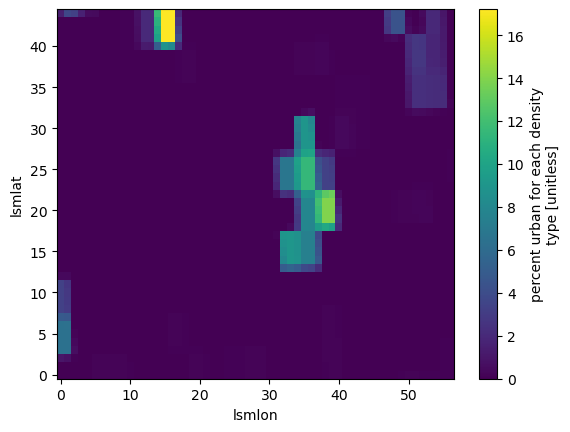

In [30]:
ds_ctsm['PCT_URBAN'][1].plot()

In [32]:
i1, i2 = 23, 36
j1, j2 = 12, 25
hd_fraction_main_urban = ds_ctsm['PCT_URBAN'][1, j1:j2, i1:i2]
hd_fraction_main_urban.min(), hd_fraction_main_urban.max()

(<xarray.DataArray 'PCT_URBAN' ()> Size: 8B
 array(0.),
 <xarray.DataArray 'PCT_URBAN' ()> Size: 8B
 array(11.43974955))

In [26]:
ctsm_urban

<xarray.DataArray 'PCT_URBAN' (lsmlat: 45, lsmlon: 57)> Size: 21kB
array([[13.98443178, 13.98443178, 15.27460034, ...,  5.42314011,
         1.76670068,  1.6773499 ],
       [13.98443178, 13.98443178, 15.3269779 , ...,  6.0037936 ,
         2.67138524,  2.67138524],
       [13.79981131, 13.84146913, 18.92973808, ...,  5.81273884,
         2.67138524,  2.67138524],
       ...,
       [23.08634752, 45.50323451, 45.50323451, ..., 36.2164155 ,
        35.08154532, 31.75129773],
       [24.19230913, 45.50323451, 45.50323451, ..., 32.63204432,
        32.37284761, 32.02580249],
       [29.68152471, 55.22118602, 54.34389472, ..., 32.63204432,
        32.34311351, 32.02580249]])
Dimensions without coordinates: lsmlat, lsmlon

In [39]:
ds_wrf = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WRF-CTSM/d04/wrfinput_d01')
ds_wrf

<xarray.Dataset> Size: 13MB
Dimensions:               (Time: 1, south_north: 45, west_east: 57,
                           bottom_top: 43, bottom_top_stag: 44,
                           soil_layers_stag: 4, dust_erosion_dimension: 3,
                           west_east_stag: 58, south_north_stag: 46,
                           DIM0010: 5, land_cat_stag: 21, soil_cat_stag: 16,
                           urban_wind_directions_stag: 4, month_hour: 288,
                           num_ext_model_couple_dom_stag: 1)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 10kB ...
    XLONG                 (Time, south_north, west_east) float32 10kB ...
    XLAT_U                (Time, south_north, west_east_stag) float32 10kB ...
    XLONG_U               (Time, south_north, west_east_stag) float32 10kB ...
    XLAT_V                (Time, south_north_stag, west_east) float32 10kB ...
    XLONG_V               (Time, south_north_stag, west_east) float32 10kB ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                dust_erosion_dimension, west_east_stag,
                                south_north_stag, DIM0010, land_cat_stag,
                                soil_cat_stag, urban_wind_directions_stag,
                                month_hour, num_ext_model_couple_dom_stag
Data variables: (12/195)
    Times                 (Time) |S19 19B ...
    LU_INDEX              (Time, south_north, west_east) float32 10kB ...
    ZNU                   (Time, bottom_top) float32 172B ...
    ZNW                   (Time, bottom_top_stag) float32 176B ...
    ZS                    (Time, soil_layers_stag) float32 16B ...
    DZS                   (Time, soil_layers_stag) float32 16B ...
    ...                    ...
    C4F                   (Time, bottom_top_stag) float32 176B ...
    PCB                   (Time, south_north, west_east) float32 10kB ...
    PC                    (Time, south_north, west_east) float32 10kB ...
    LANDMASK              (Time, south_north, west_east) float32 10kB ...
    LAKEMASK              (Time, south_north, west_east) float32 10kB ...
    SST                   (Time, south_north, west_east) float32 10kB ...
Attributes: (12/92)
    TITLE:                            OUTPUT FROM NDOWN_EM V4.7.0 PREPROCESSOR
    START_DATE:                      2021-12-25_00:00:00
    SIMULATION_START_DATE:           2021-12-25_00:00:00
    WEST-EAST_GRID_DIMENSION:        58
    SOUTH-NORTH_GRID_DIMENSION:      46
    BOTTOM-TOP_GRID_DIMENSION:       44
    ...                              ...
    ISLAKE:                          21
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      0
    ETAC:                            0.0

In [5]:
ds_wrf['VEGFRA'][0, 19, 30].values

array(34.677418, dtype=float32)

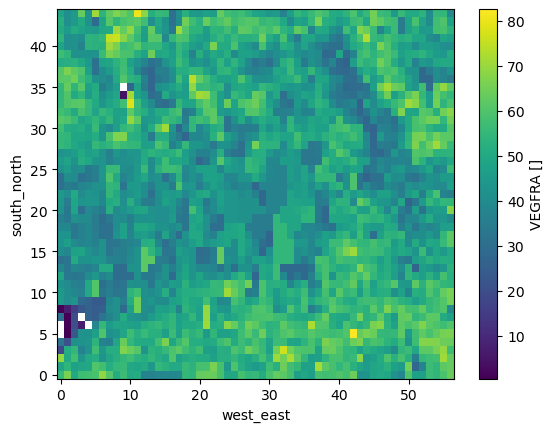

In [7]:
ds_wrf['VEGFRA'][0].where(ds_wrf['VEGFRA'][0]>0).plot()

In [40]:
wrf_urban = ds_wrf['FRC_URB2D'] # is 0, urban table 中读值
wrf_urban_percent = wrf_urban[0] *100
# wrf_urban_percent = ds_wrf['LANDUSEF'][0, 12] * 100
wrf_urban_percent

<xarray.DataArray 'FRC_URB2D' (south_north: 45, west_east: 57)> Size: 10kB
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 90.,  0.,  0.],
       [ 0., 90.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 10kB ...
    XLONG    (south_north, west_east) float32 10kB ...
Dimensions without coordinates: south_north, west_east

In [ ]:
wrf_urban_percent_mask = wrf_urban_percent.where(wrf_urban_percent == 0, 100, 0)

In [41]:
urban_percent_values = np.unique(wrf_urban_percent.values)
urban_percent_values

array([ 0., 90.], dtype=float32)

In [4]:
pct_urban = ds_ctsm['PCT_URBAN']
wtroad_perv = ds_ctsm['WTROAD_PERV']
wtlunit_roof = ds_ctsm['WTLUNIT_ROOF']
per_imperv = (wtlunit_roof + (1 - wtlunit_roof) * (1 - wtroad_perv)) * pct_urban
per_imperv_sum = per_imperv.sum(dim='numurbl')

In [7]:
per_imperv_sum_city_center = np.round(per_imperv_sum[30, 18],1)
per_imperv_sum_city_center

<xarray.DataArray ()> Size: 8B
array(44.5)

In [44]:
ds_d01 = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WPS/geo_em.d01.nc')
ds_d02 = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WPS/geo_em.d02.nc')
ds_d03 = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WPS/geo_em.d03.nc')
ds_d04 = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WPS/geo_em.d04.nc')

In [45]:
extent_list = []
for domain in [ds_d01, ds_d02, ds_d03, ds_d04]:
    domain_lat = domain['XLAT_M'].squeeze()
    domain_lon = domain['XLONG_M'].squeeze()
    domain_lat_min, domain_lat_max = domain_lat.min().item(), domain_lat.max().item()
    domain_lon_min, domain_lon_max = domain_lon.min().item(), domain_lon.max().item()
    extent_list.append([domain_lon_min, domain_lon_max, domain_lat_min, domain_lat_max])


In [59]:
labelcolor = '#6b6b6b'
linewidth = 0.5
proj = ccrs.PlateCarree()
vmin = 0
vmax = 100
cmap_obj = cm.get_cmap('viridis')
cmap = 'viridis'
base_cmap = plt.cm.viridis
start_color = cmap_obj(0.0)
end_color = cmap_obj(1.0)
custom_cmap  = ListedColormap([start_color, end_color])
'''
normalized_vals = (urban_percent_values - urban_percent_values.min()) / (
    urban_percent_values.max() - urban_percent_values.min())
colors = [base_cmap(val) for val in normalized_vals]
custom_cmap = ListedColormap(colors)
'''
ax1_extent = [-10, 6, 47.5, 61]
alpha=0.5
ax23_extent = [ctsm_lon.min().item()-360, ctsm_lon.max().item()-360, ctsm_lat.min().item(), ctsm_lat.max().item()]
labelsize = 6
tick_length = 2
boundarywidth = 0.5
ticklabel_pad = 0.1
title_list = ['Simulation domains', 
              'Percentage of urban area for GM_SLUCM (%)', 'Percentage of urban area for GM_CLMU (%)',
              'Percentage of impervious area for GM_SLUCM (%)', 'Percentage of impervious area for GM_CLMU (%)']
labelfont = 6
padding =4
cbar_pad = 0.025
cbar_aspect = 10
cbar_shrink = 0.3

/tmp/ipykernel_763882/173177366.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_obj = cm.get_cmap('viridis')


In [17]:
print(ax23_extent)

[-2.78076171875, -1.771240234375, 53.27471160888672, 53.74923324584961]


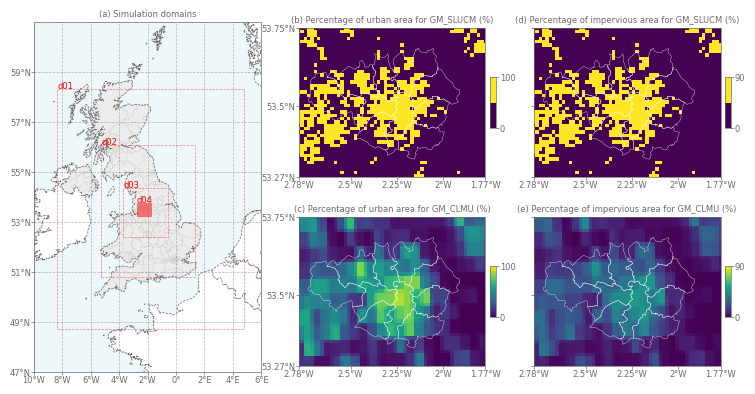

In [70]:
fig = plt.figure(figsize=(7.5, 3.9))
gs = gridspec.GridSpec(2, 3, width_ratios=[1.15, 1, 1])
ax1 = fig.add_subplot(gs[:, 0], projection=proj)
ax2 = fig.add_subplot(gs[0, 1], projection=proj)
ax3 = fig.add_subplot(gs[1, 1], projection=proj)
ax4 = fig.add_subplot(gs[0, 2], projection=proj)
ax5 = fig.add_subplot(gs[1, 2], projection=proj)
gdf_platecarree.plot(ax=ax1, edgecolor=labelcolor, linewidth = linewidth/2, facecolor=labelcolor, alpha=alpha/4, transform=proj)

ax1.add_feature(cfeature.BORDERS, edgecolor=labelcolor, linewidth=linewidth, linestyle='--')
ax1.add_feature(cfeature.COASTLINE, edgecolor=labelcolor, linewidth=linewidth, linestyle='--')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.2)
for i in range(4):
    domain_extent = extent_list[i]
    if i ==3:
        linestyle = '-'
        facecolor = 'red'
    else:
        linestyle = '--'   
        facecolor = 'none' 
    rect = Rectangle((domain_extent[0], domain_extent[2]),
                     domain_extent[1] - domain_extent[0],
                     domain_extent[3] - domain_extent[2],
                     edgecolor='red', facecolor=facecolor, linewidth=linewidth,
                     linestyle=linestyle, alpha = 0.5,
                     transform=ccrs.PlateCarree())
    ax1.add_patch(rect)
    ax1.text(domain_extent[0], domain_extent[3]+0.3, f'd0{i+1}', color = 'red', fontsize= labelsize, ha='left', va='top')
ax1.set_extent(ax1_extent, crs=proj)
ax1.set_xticks(range(int(ax1_extent[0]), int(ax1_extent[1])+2, 2), crs = proj)  # Adjust step size as needed
ax1.set_yticks(range(int(ax1_extent[2]), int(ax1_extent[3]), 2), crs = proj)  # Adjust step size as needed 
ax1.grid('both', linewidth=linewidth, color=labelcolor, alpha=alpha, linestyle='--') 
ax1.tick_params(axis='both', labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width = boundarywidth,colors=labelcolor)
cm_wrf = ax2.pcolormesh(ctsm_lon, ctsm_lat, wrf_urban_percent_mask, vmin=vmin, vmax=vmax, cmap=custom_cmap, transform=proj)
cm_ctsm = ax3.pcolormesh(ctsm_lon, ctsm_lat, ctsm_urban, vmin=vmin, vmax=vmax, cmap=cmap, transform=proj)
cm_wrf_imperv = ax4.pcolormesh(ctsm_lon, ctsm_lat, wrf_urban_percent, vmin=vmin, vmax=90, cmap=custom_cmap, transform=proj)
cm_ctsm_imperv = ax5.pcolormesh(ctsm_lon, ctsm_lat, per_imperv_sum, vmin=vmin, vmax=90, cmap=cmap, transform=proj)
for ax in [ax2, ax3, ax4, ax5]:
    gdf_greater_manchester.plot(ax=ax, edgecolor='white', linewidth = linewidth/2, facecolor='none', transform=proj)
    ax.set_extent(ax23_extent, crs=proj)
    ax.set_xticks([np.round(ax23_extent[0],2), -2.5, -2.25, -2, np.round(ax23_extent[1],2)], crs=proj)  
    ax.set_yticks([np.round(ax23_extent[2],2),  53.5, np.round(ax23_extent[3],2)], crs=proj)
    if ax in [ax4, ax5]:
        labelleft = False
    else:
        labelleft = True    
    ax.tick_params(axis='y', labelleft = labelleft, labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)   
#ax2.tick_params(axis='x', labelbottom=False, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)  
    ax.tick_params(axis='x', labelsize=labelsize, length=tick_length, pad=ticklabel_pad, width=boundarywidth, colors=labelcolor)
ax2_cbar = plt.colorbar(cm_wrf, ax=ax2, orientation='vertical', ticks=[vmin, vmax], pad=cbar_pad, aspect=cbar_aspect, shrink=cbar_shrink, extend='neither', fraction=0.03)
ax3_cbar = plt.colorbar(cm_ctsm, ax=ax3, orientation='vertical', ticks=[vmin, vmax], pad=cbar_pad, aspect=cbar_aspect, shrink=cbar_shrink, extend='neither', fraction=0.03)
ax4_cbar = plt.colorbar(cm_wrf_imperv, ax=ax4, orientation='vertical', ticks=[vmin, 90], pad=cbar_pad, aspect=cbar_aspect, shrink=cbar_shrink, extend='neither', fraction=0.03)
ax5_cbar = plt.colorbar(cm_ctsm_imperv, ax=ax5, orientation='vertical', ticks=[vmin, 90], pad=cbar_pad, aspect=cbar_aspect, shrink=cbar_shrink, extend='neither', fraction=0.03)
for cbar in [ax2_cbar, ax3_cbar, ax4_cbar, ax5_cbar]:
    #cbar.formatter = ScalarFormatter(useMathText=True) # Use scientific notation
    #cbar.formatter.set_powerlimits((0, 0))
    if cbar in [ax4_cbar, ax5_cbar]:
        cbar.set_ticks([vmin, 90])
        cbar.set_ticklabels([vmin, 90])
    else:    
        cbar.set_ticks([vmin, vmax])
        cbar.set_ticklabels([vmin, vmax])
    offset_text = cbar.ax.yaxis.get_offset_text()
    offset_text.set(size=labelsize, color=labelcolor)
    offset_text.set_position((5, 2))
    cbar.ax.tick_params(length=2,labelsize=labelsize, pad = 1, width=boundarywidth, colors=labelcolor)
    cbar.outline.set_linewidth(boundarywidth)
    cbar.outline.set_edgecolor(labelcolor)
    cbar.ax.yaxis.label.set_color(labelcolor)
    #cbar.ax.set_position([0.35, -0.45, 0.3, 0.5])
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):    
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    for spine in ax.spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)
    ax.set_title(f'({string.ascii_lowercase[i]}) {title_list[i]}',fontsize=labelfont,color=labelcolor, pad = padding)     
plt.subplots_adjust(left=0.045, right=0.975, bottom=0.045, top=0.97, wspace=0.18, hspace=0.1)  
fig.savefig('land_representation.png', dpi=300) 
fig.savefig('land_representation.pdf', dpi=600) 
plt.show()

# Total urban areas

In [79]:
ds_gm_mask = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/output_analysis/gm_mask/gm_surf_mask.nc')
ds_gm_mask

<xarray.Dataset> Size: 3kB
Dimensions:       (lsmlat: 45, lsmlon: 57)
Coordinates:
  * lsmlat        (lsmlat) int64 360B 0 1 2 3 4 5 6 7 ... 38 39 40 41 42 43 44
  * lsmlon        (lsmlon) int64 456B 0 1 2 3 4 5 6 7 ... 50 51 52 53 54 55 56
Data variables:
    gm_surf_mask  (lsmlat, lsmlon) bool 3kB ...

In [72]:
ds_ctsm_lilac = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/check_downscale/3.6to1.2ctsm/ctsm_lilac.clm2.h0.2021-12-25-03600.nc')
ds_area = ds_ctsm_lilac['area']
ds_area

<xarray.DataArray 'area' (lat: 45, lon: 57)> Size: 10kB
[2565 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 228B 357.2 357.2 357.3 357.3 ... 358.2 358.2 358.2
  * lat      (lat) float32 180B 53.27 53.29 53.3 53.31 ... 53.73 53.74 53.75
Attributes:
    long_name:  grid cell areas
    units:      km^2

In [90]:
ds_gm_mask_ctsm = ds_gm_mask.rename({'lsmlat': 'lat', 'lsmlon': 'lon'})
ds_gm_mask_ctsm = ds_gm_mask_ctsm.assign_coords({'lat': ds_area['lat'], 'lon': ds_area['lon']})
ctsm_urban_area = (ds_area * (ds_ctsm_lilac['PCT_LANDUNIT'][0, 6:9].sum(dim='ltype')) / 100).where(ds_gm_mask_ctsm['gm_surf_mask'])
ctsm_urban_area

<xarray.DataArray (lat: 45, lon: 57)> Size: 10kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 228B 357.2 357.2 357.3 357.3 ... 358.2 358.2 358.2
  * lat      (lat) float32 180B 53.27 53.29 53.3 53.31 ... 53.73 53.74 53.75
    time     datetime64[ns] 8B 2021-12-25T00:30:00.000053644

In [96]:
wrf_urban_area = (ds_area * wrf_urban_percent_mask.rename({'south_north': 'lat', 'west_east': 'lon'}) / 100).where(ds_gm_mask_ctsm['gm_surf_mask'])
wrf_urban_area

<xarray.DataArray (lat: 45, lon: 57)> Size: 10kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 228B 357.2 357.2 357.3 357.3 ... 358.2 358.2 358.2
  * lat      (lat) float32 180B 53.27 53.29 53.3 53.31 ... 53.73 53.74 53.75
    XLAT     (lat, lon) float32 10kB 53.27 53.27 53.27 ... 53.72 53.72 53.72
    XLONG    (lat, lon) float32 10kB -2.781 -2.763 -2.745 ... -1.75 -1.732

In [97]:
print(np.round(wrf_urban_area.sum().values,2), 
      np.round(ctsm_urban_area.sum().values,2))

529.91 549.79


# Surface data

In [4]:
ds_surf = xr.open_dataset(f'{home_path}0_WRFvsWRF-CTSM/input/WRF-CTSM/surfdata_1.2x1.2_SSP5-8.5_2022_78pfts_c250607.nc')
surf_mask = xr.open_dataset('../gm_mask/gm_surf_mask.nc')
surf_mask

<xarray.Dataset> Size: 3kB
Dimensions:       (lsmlat: 45, lsmlon: 57)
Coordinates:
  * lsmlat        (lsmlat) int64 360B 0 1 2 3 4 5 6 7 ... 38 39 40 41 42 43 44
  * lsmlon        (lsmlon) int64 456B 0 1 2 3 4 5 6 7 ... 50 51 52 53 54 55 56
Data variables:
    gm_surf_mask  (lsmlat, lsmlon) bool 3kB ...

In [5]:
ds_surf_pct_urban = ds_surf['PCT_URBAN'].where(surf_mask['gm_surf_mask'] == 1)
ds_surf_pct_urban

<xarray.DataArray 'PCT_URBAN' (numurbl: 3, lsmlat: 45, lsmlon: 57)> Size: 62kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lsmlat   (lsmlat) int64 360B 0 1 2 3 4 5 6 7 8 ... 37 38 39 40 41 42 43 44
  * lsmlon   (lsmlon) int64 456B 0 1 2 3 4 5 6 7 8 ... 49 50 51 52 53 54 55 56
Dimensions without coordinates: numurbl
Attributes:
    long_name:  percent urban for each density type
    units:      unitless

In [12]:
pct_urban_sum = ds_surf_pct_urban.sum()
pct_urban_landunit_sum = 100* ds_surf_pct_urban.sum(dim=['lsmlat', 'lsmlon']) / pct_urban_sum
pct_urban_landunit_sum

<xarray.DataArray 'PCT_URBAN' (numurbl: 3)> Size: 24B
array([ 0.        ,  2.32182259, 97.67817741])
Dimensions without coordinates: numurbl

# HadISD

In [6]:
pct_urban_hadisd = ds_ctsm['PCT_URBAN'][:, 9, 28]
pct_urban_hadisd.values

array([ 0.       ,  0.       , 66.3586638])

In [100]:
per_imperv_sum[9, 28].values

array(36.49725117)

# City center and main urban area

In [102]:
i1, i2 = 23, 36 # lon
j1, j2 = 12, 25 # lat
center_i, center_j = 30, 18

In [106]:
clmu_urban_center = ctsm_urban[center_j, center_i].item()
clmu_urban_main_urban = ctsm_urban[j1:j2, i1:i2].mean().item()
slucm_urban_center = wrf_urban_percent_mask[center_j, center_i].item()
slucm_urban_main_urban = wrf_urban_percent_mask[j1:j2, i1:i2].mean().item()
[clmu_urban_center, clmu_urban_main_urban, slucm_urban_center, slucm_urban_main_urban]

[88.24227244932186, 70.86024394438485, 100.0, 82.84024047851562]

In [109]:
clmu_imperv_center = per_imperv_sum[center_j, center_i].item()
clmu_imperv_main_urban = per_imperv_sum[j1:j2, i1:i2].mean().item()
slucm_imperv_center = wrf_urban_percent[center_j, center_i].item()
slucm_imperv_main_urban = wrf_urban_percent[j1:j2, i1:i2].mean().item()
[slucm_imperv_center, clmu_imperv_center, slucm_imperv_main_urban, clmu_imperv_main_urban]

[90.0, 48.53323133720719, 74.55621337890625, 39.48793663358253]